In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

from check_collision import check_all_collisions
from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'

ribs = [Rib([[-101.,151.],[-99.,151.],[-99.,150.],[-101.,150.]]) , Rib([[1001.,151.],[999.,151.],[999.,150.],[1001.,150.]]) ,Rib(np.asarray([[-1000.,0],[1000.,0],[1000.,-100.],[-1000.,-100.]]))]
    


In [2]:
plt.close('all') 

runs/analytisk/RK45_RK23_200_[0.05, 0.06]_1e-01_linear_test16.9.22.pickle
runs/analytisk/RK45_RK23_200_[0.06, 0.07]_1e-01_linear_test16.9.22.pickle
runs/analytisk/RK45_RK23_200_[0.2, 0.3]_1e-01_linear_test16.9.22.pickle
runs/analytisk/RK45_RK23_200_[0.1, 0.2]_1e-01_linear_test16.9.22.pickle
runs/analytisk/RK45_RK23_200_[0.09, 0.1]_1e-01_linear_test16.9.22.pickle
runs/analytisk/RK45_RK23_200_[0.07, 0.08]_1e-01_linear_test16.9.22.pickle
runs/analytisk/RK45_RK23_200_[0.08, 0.09]_1e-01_linear_test16.9.22.pickle


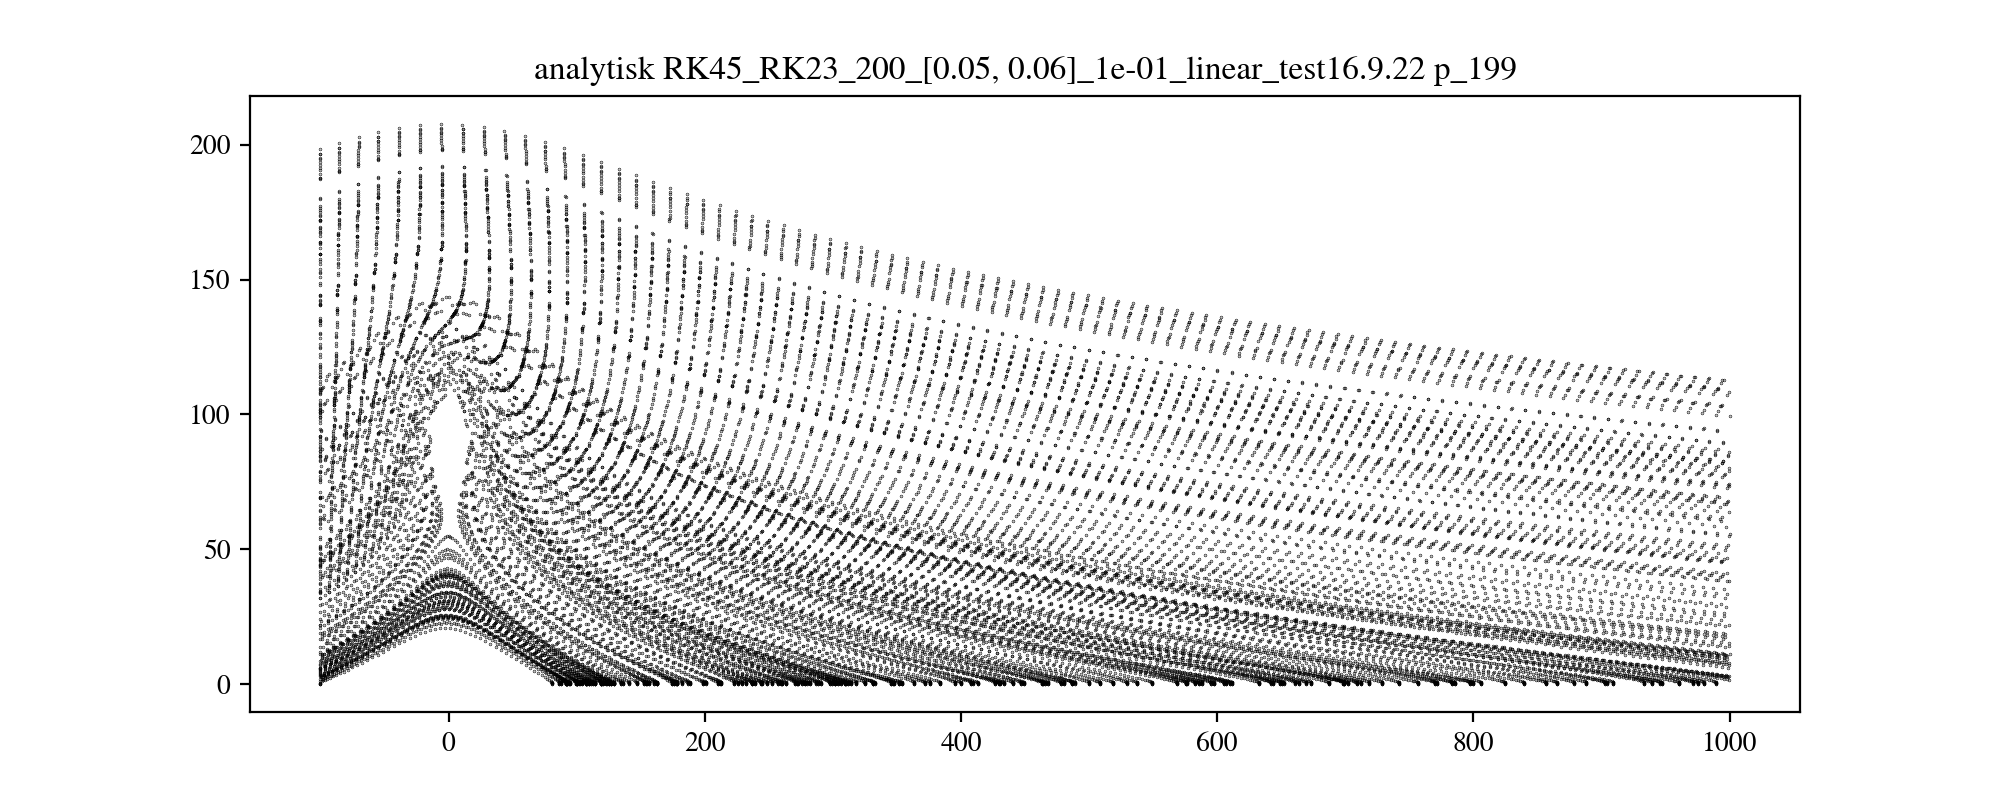

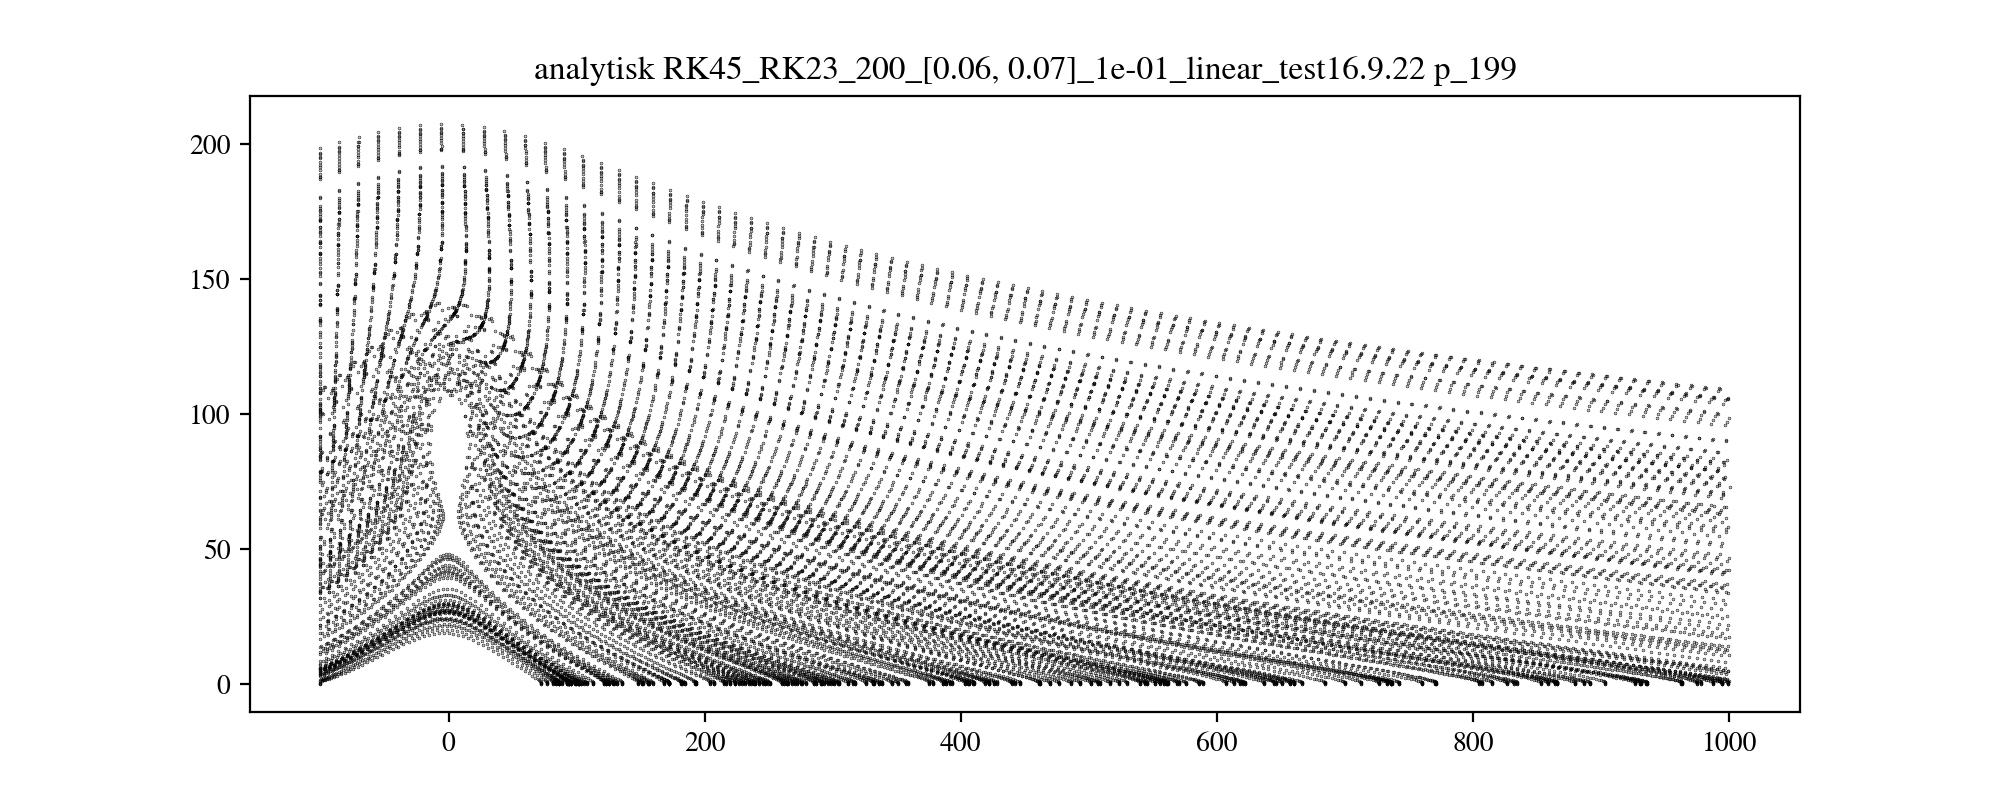

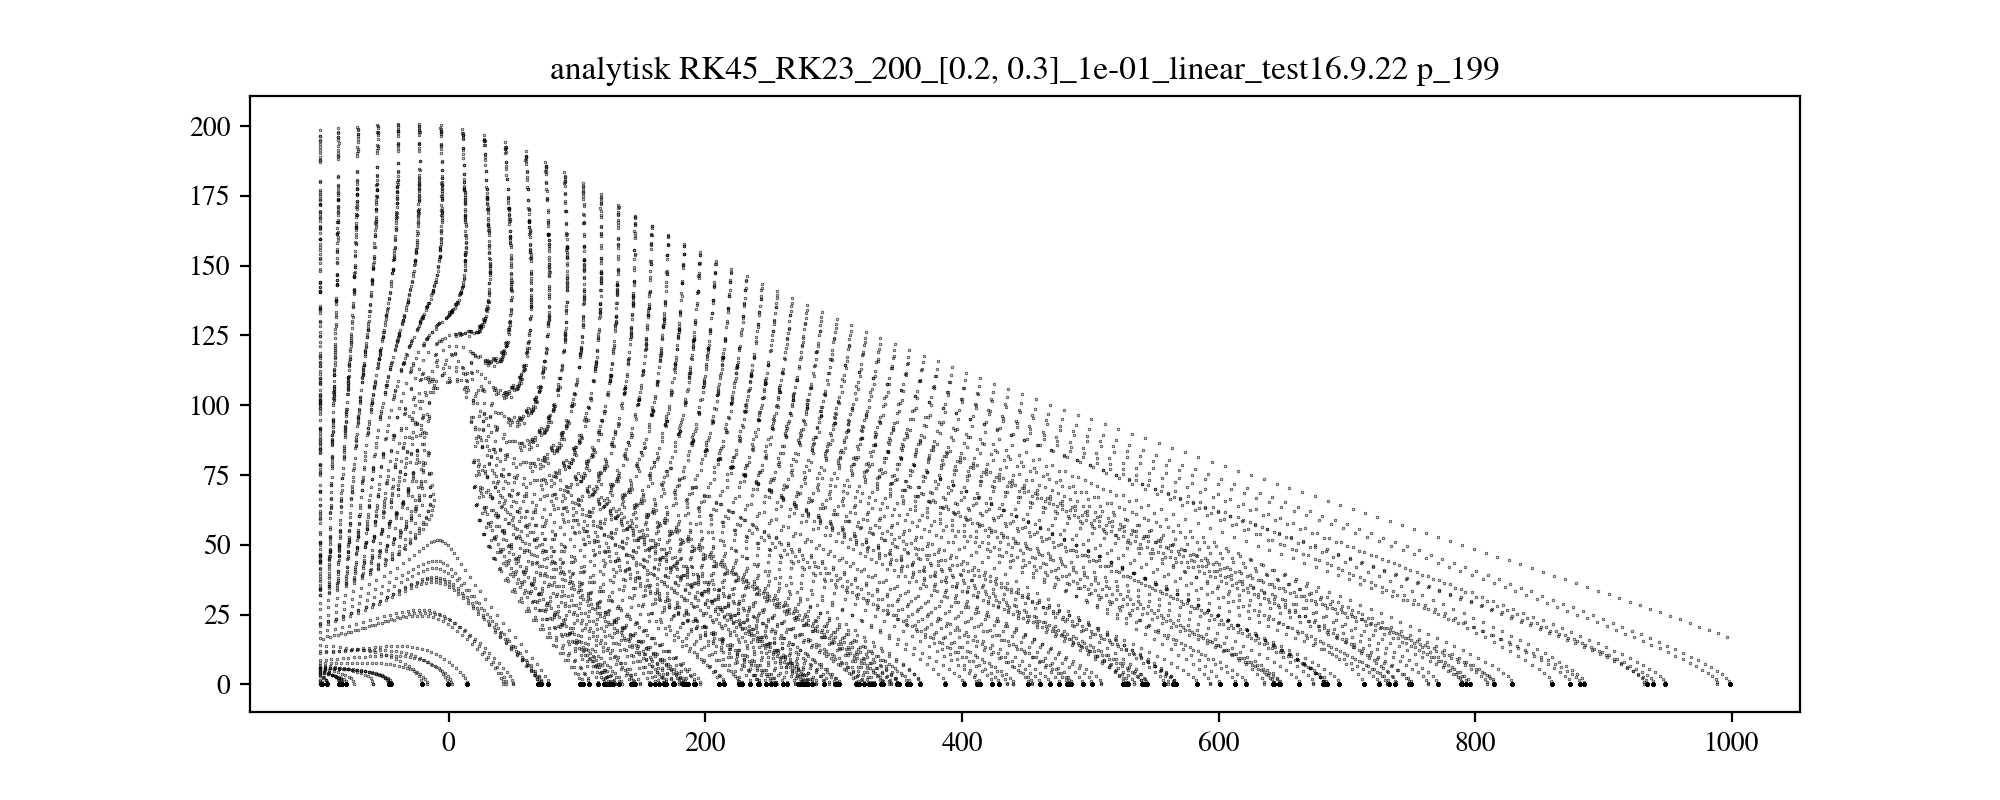

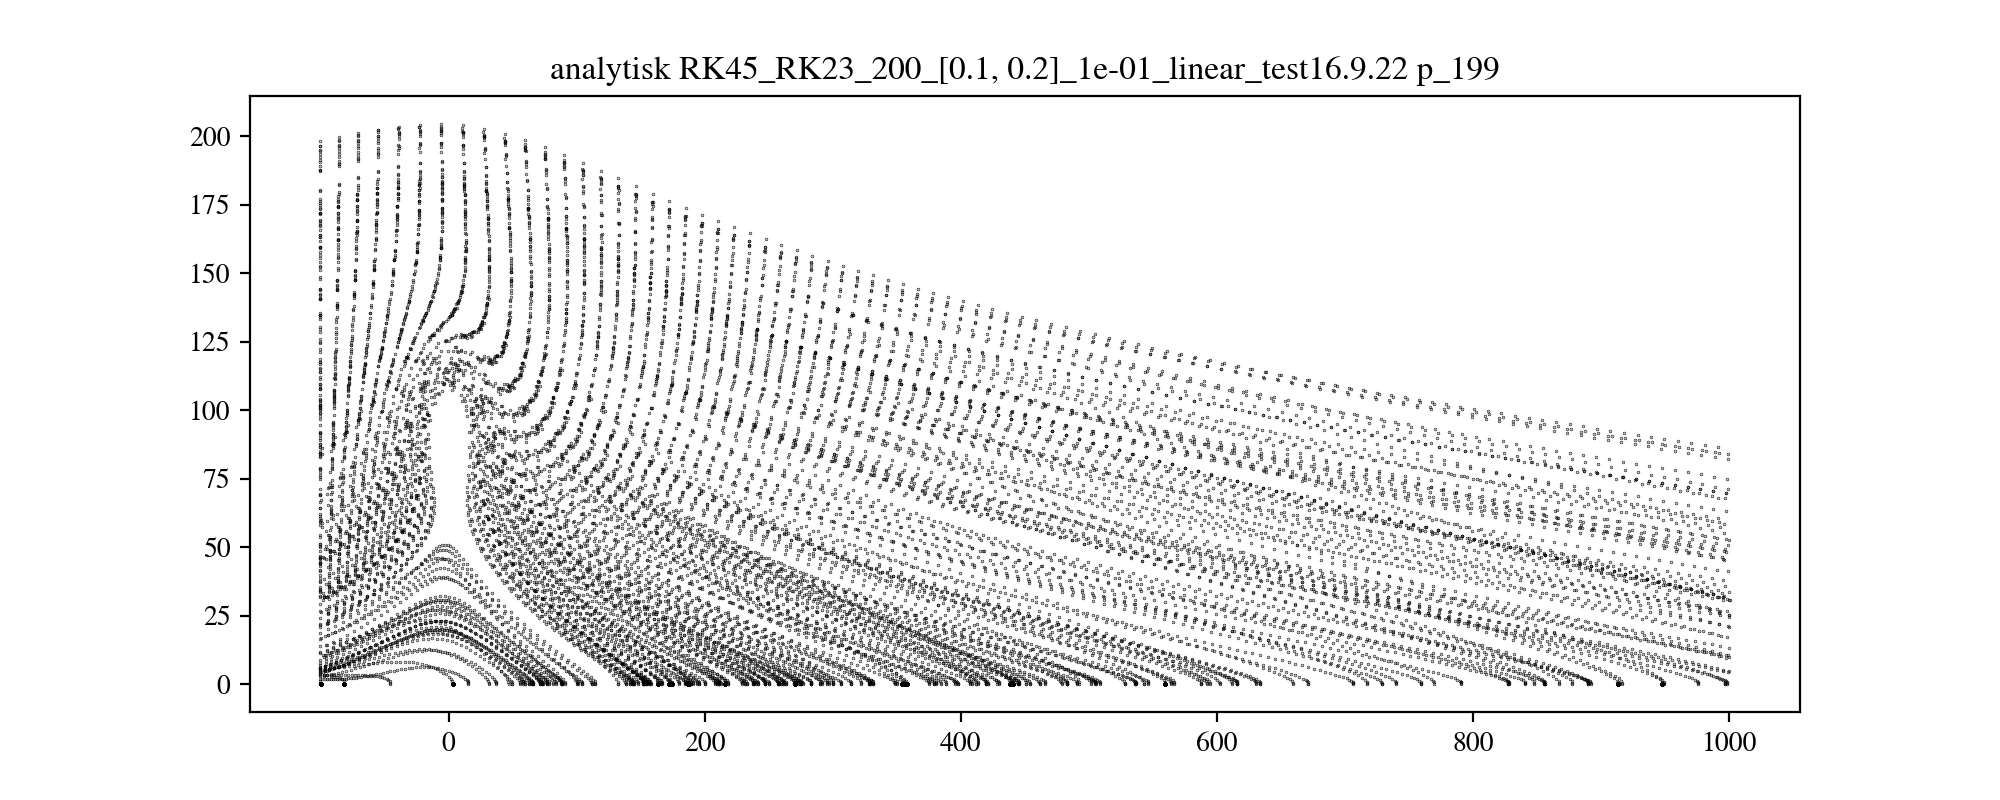

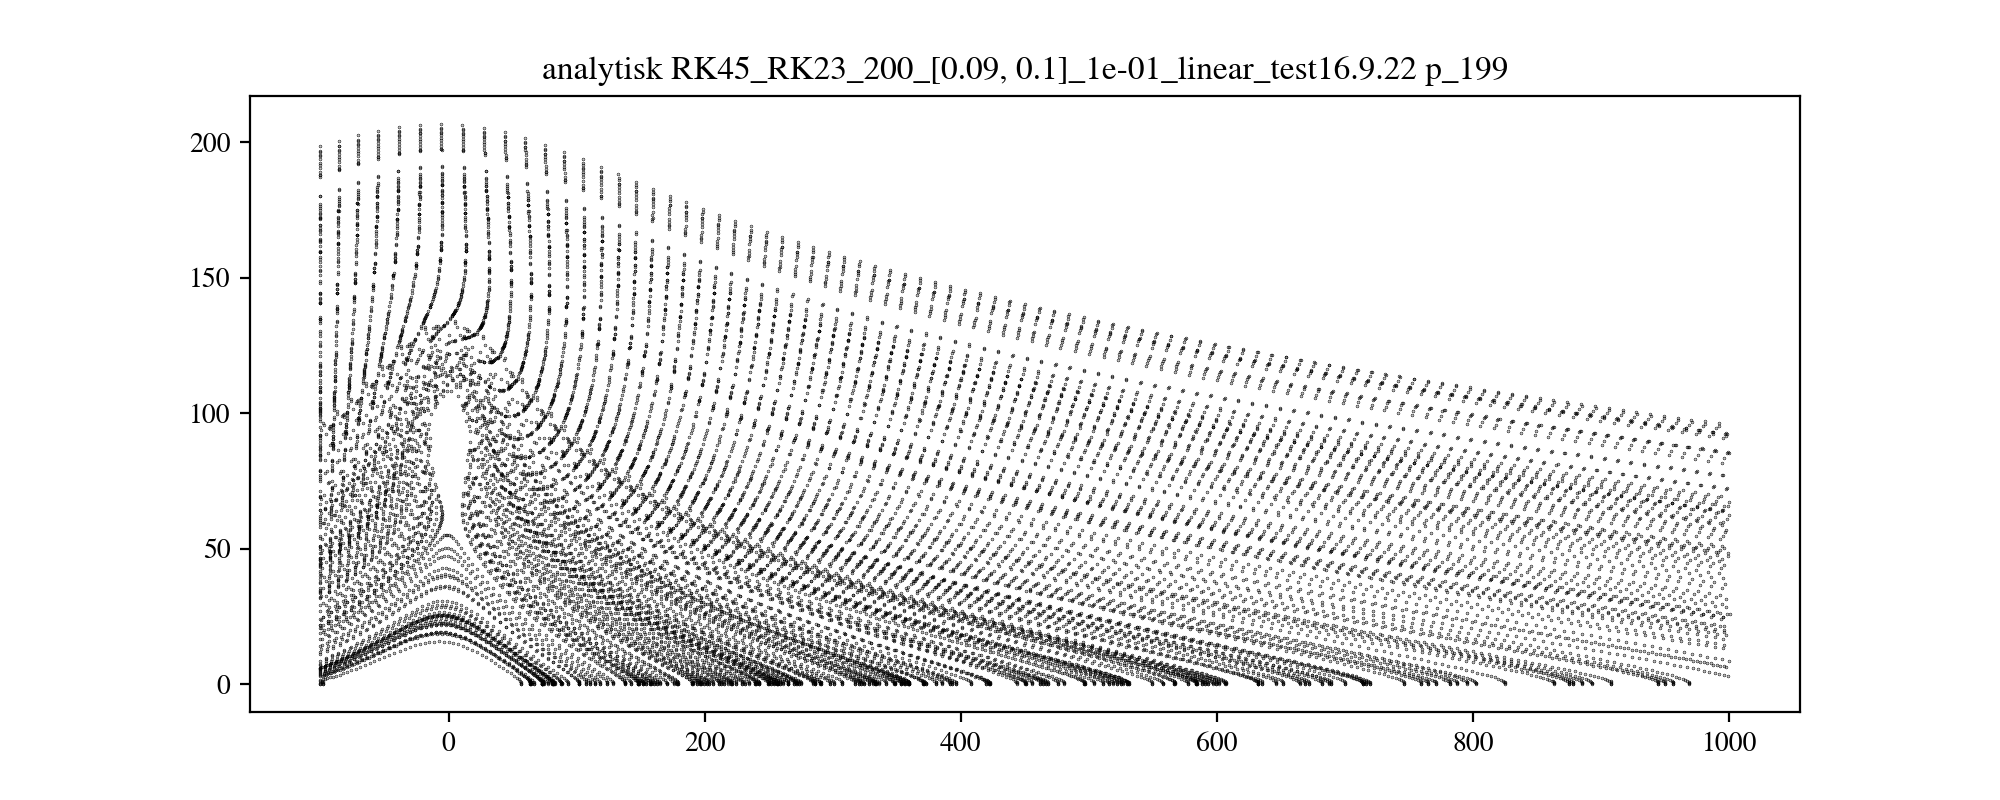

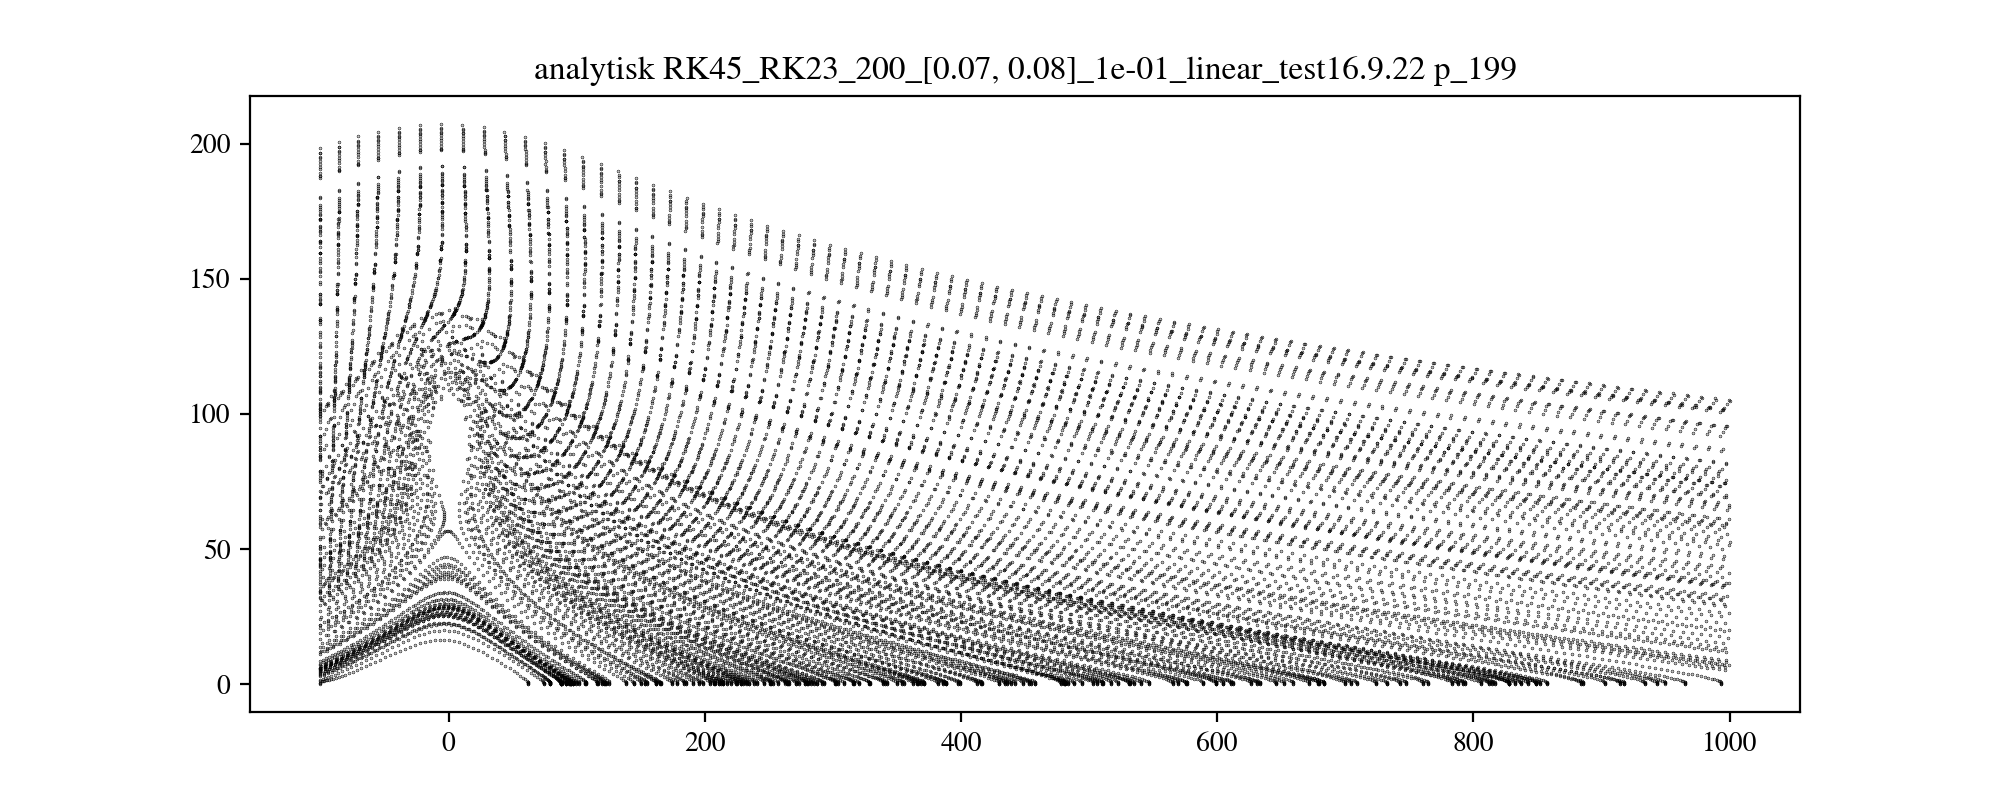

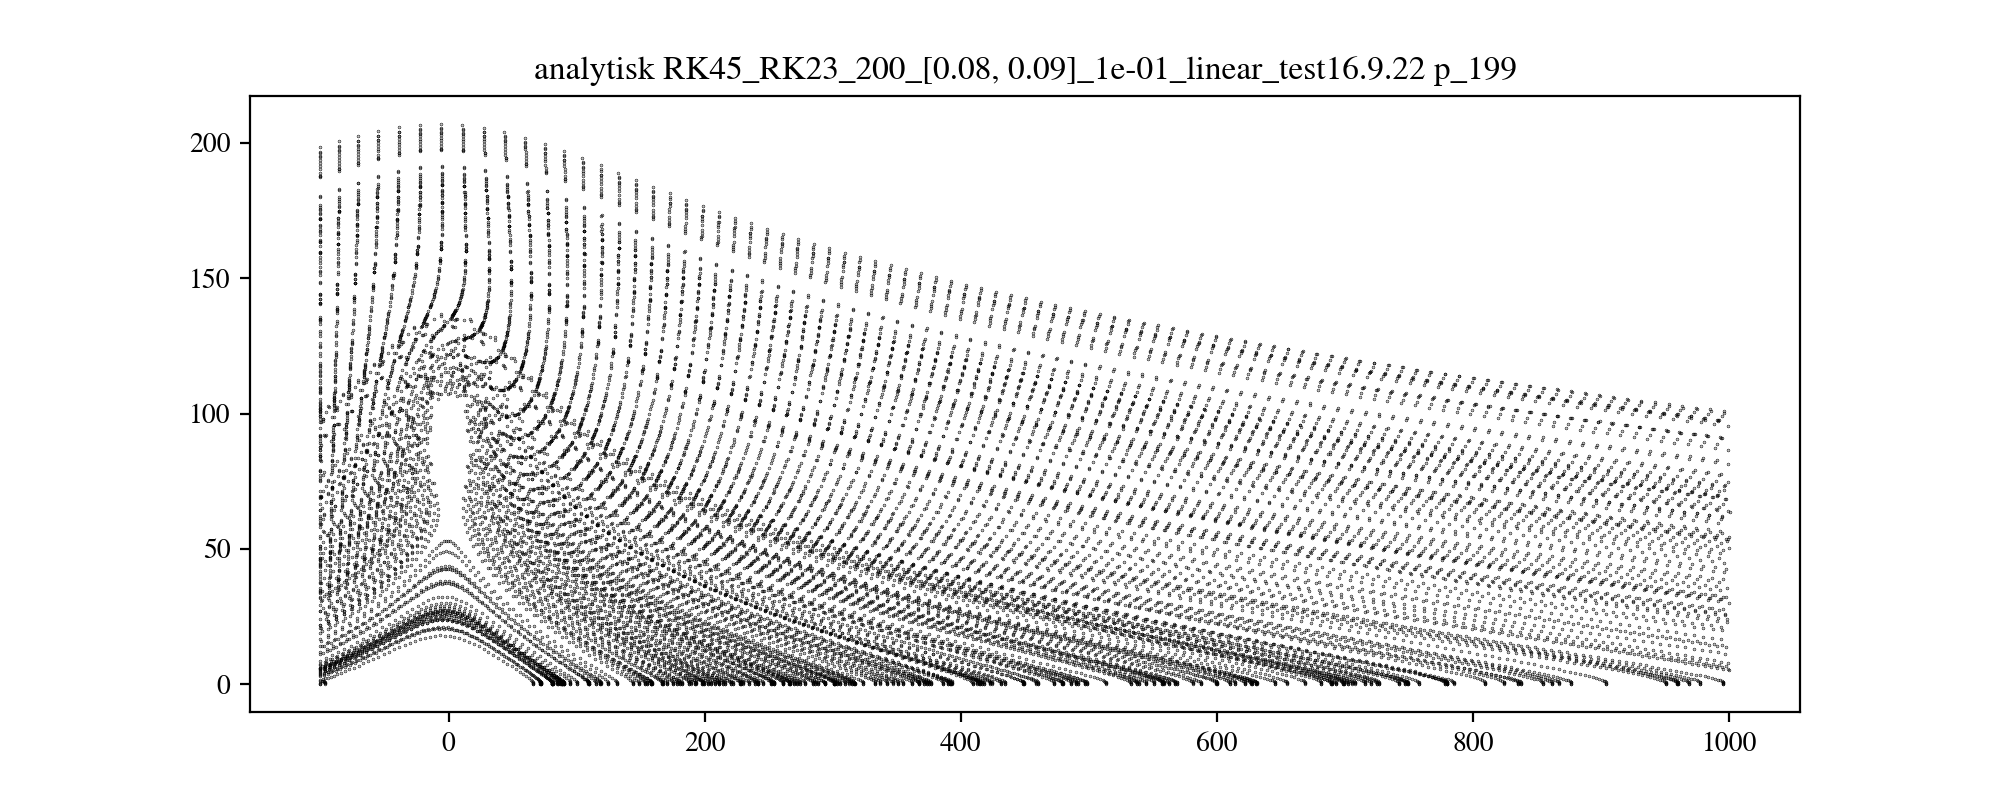

In [3]:
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in Path("./runs/analytisk/").glob("RK45_RK23_200_[*"):
    print(partikkelfil)
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)
    skalering = 1
    myDPI = 300

    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(10,4),dpi=200)
    # ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
    # ax.add_patch(Polygon(ribs[1].vertices, facecolor='red'))

    for p in partiklar:
        sti = p.sti_dict
        init = int(sti['init_time'])
        final = int(sti['final_time'])
        plott_array = np.zeros((final+1-init,4))
        for frame in range(init,final+1):
            plott_array[frame-init,:] = np.asarray(sti[frame]['position'])#+np.asarray([sti[frame]['loops']*x_width,0,0,0])
    # if not np.any(plott_array[:,1]<0):
        #     continue

        ax.plot(plott_array[:,0], plott_array[:,1], "ko", markersize=0.2)

        ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
        # if p.index > 0:
        #     break